## Импорт необходимых библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## Отображение на графике области принятия решения

In [2]:
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0
    x_min, x_max = x[:, 0].min() - eps, x[:, 0].max() + eps
    y_min, y_max = x[:, 1].min() - eps, x[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    x1, x2 = np.meshgrid(xx, yy)
    x_grid = np.c_[x1.ravel(), x2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0,
        decision_values.max()]
    except AttributeError:
        decision_values = classifier.predict_proba(x_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]
    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(x1, x2, decision_values.reshape(x1.shape),
        levels=fill_levels, colors=['blue', 'red', 'yellow'])
    if line:
        ax.contour(x1, x2, decision_values.reshape(x1.shape), levels=levels, colors="pink")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

## Генерация выборки
| Вид класса | random_state | cluster_std | noise | centers |
|:----------:|:------------:|:-----------:|:-----:|:-------:|
|    blobs   |      41      |      3      |   -   |    2    |

In [3]:
x, y = make_moons(noise=0.25, random_state=41)

In [4]:
print("Координаты x y:\n", x[:15])
print("Метки класса: ", y[:15])

Координаты x y:
 [[-1.53415216 -0.08217918]
 [ 2.16440543 -0.2734159 ]
 [-0.58527459  0.85376957]
 [ 1.35195628  0.38893433]
 [ 1.46479345 -0.25172895]
 [-0.64362199  1.06018572]
 [ 0.40847955  0.87854153]
 [ 1.16692891 -0.03600687]
 [-0.70389555  0.90891989]
 [ 1.69466082 -0.36203457]
 [ 0.60290958 -0.69829682]
 [ 0.16150261 -0.15701266]
 [-0.07098503 -0.50788692]
 [ 0.6133523   0.04294663]
 [ 0.43329615  0.04721913]]
Метки класса:  [0 1 0 0 1 0 0 0 0 1 1 1 1 0 1]


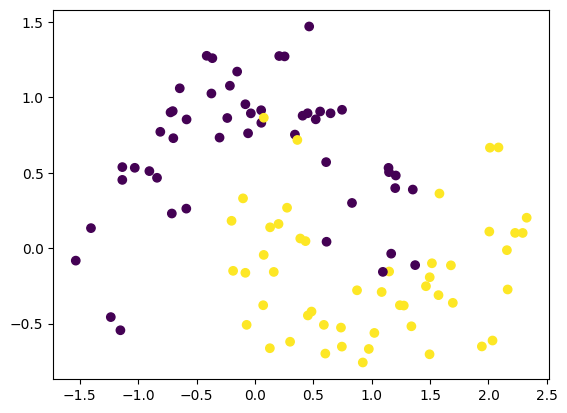

In [5]:
plt.scatter(x[:,0], x[:,1], c=y)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state=1)

### Обучающая выборка

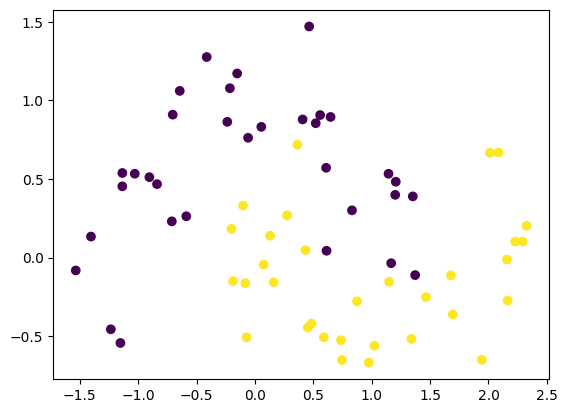

In [7]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

### Тестовая выборка

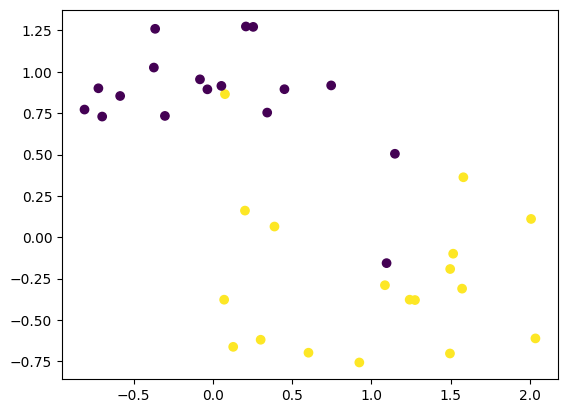

In [8]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_test)

## Обучение модели и классификация

In [9]:
def print_classification_metrics(classifier, x, y, prediction, y_test):
    print("Предсказанные и истинные значения")
    print(prediction)
    print(y_test)
    
    print("Матрица ошибок")
    print(confusion_matrix(y_test, prediction))
    print("Точность классификации: ", accuracy_score(prediction, y_test))
    print("Значения полноты, точности, f1-меры и аккуратности")
    print(classification_report(y_test, prediction))
    print("Значение площади под кривой ошибок (AUC ROC)")
    print(roc_auc_score(y_test, prediction))
    print("Область принятия решений")
    plt.xlabel("first feature")
    plt.ylabel("second feature")
    plot_2d_separator(knn, x, fill=True)
    plt.scatter(x[:, 0], x[:, 1], c=y, s=70)
    plt.show()

### Метод k-ближайших соседей

n_neightbors =  1
Предсказанные и истинные значения
[1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0]
[1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1]
Матрица ошибок
[[15  2]
 [ 3 15]]
Точность классификации:  0.8571428571428571
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        17
           1       0.88      0.83      0.86        18

    accuracy                           0.86        35
   macro avg       0.86      0.86      0.86        35
weighted avg       0.86      0.86      0.86        35

Значение площади под кривой ошибок (AUC ROC)
0.857843137254902
Область принятия решений


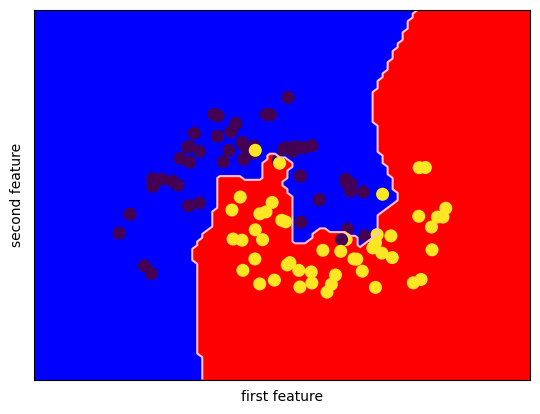

n_neightbors =  3
Предсказанные и истинные значения
[1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0]
[1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1]
Матрица ошибок
[[16  1]
 [ 2 16]]
Точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.89      0.91        18

    accuracy                           0.91        35
   macro avg       0.92      0.92      0.91        35
weighted avg       0.92      0.91      0.91        35

Значение площади под кривой ошибок (AUC ROC)
0.9150326797385621
Область принятия решений


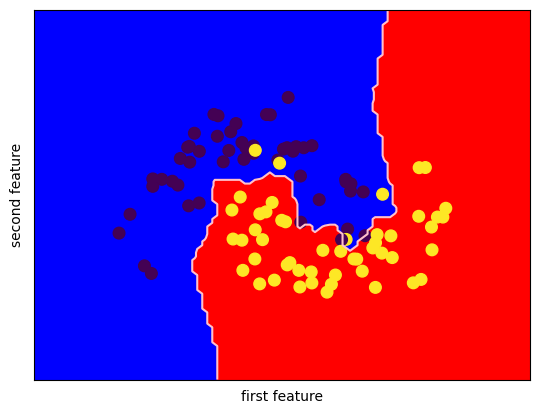

n_neightbors =  5
Предсказанные и истинные значения
[1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0]
[1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1]
Матрица ошибок
[[16  1]
 [ 2 16]]
Точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.89      0.91        18

    accuracy                           0.91        35
   macro avg       0.92      0.92      0.91        35
weighted avg       0.92      0.91      0.91        35

Значение площади под кривой ошибок (AUC ROC)
0.9150326797385621
Область принятия решений


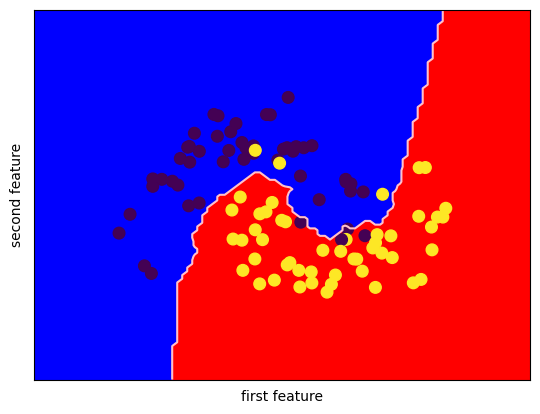

n_neightbors =  9
Предсказанные и истинные значения
[1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0]
[1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1]
Матрица ошибок
[[16  1]
 [ 2 16]]
Точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.89      0.91        18

    accuracy                           0.91        35
   macro avg       0.92      0.92      0.91        35
weighted avg       0.92      0.91      0.91        35

Значение площади под кривой ошибок (AUC ROC)
0.9150326797385621
Область принятия решений


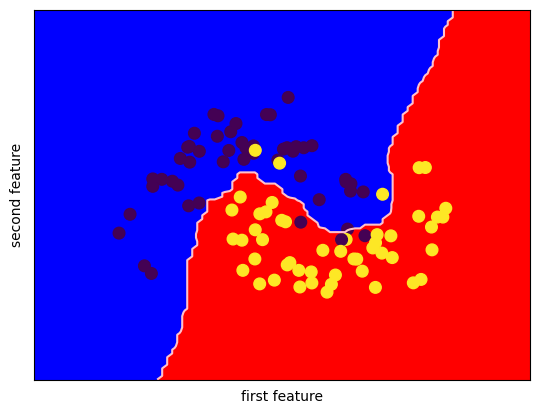

In [10]:
for i in [1, 3, 5, 9]:  
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    knn.fit(x_train, y_train)
    prediction = knn.predict(x_test)
    print("n_neightbors = ", i)
    print_classification_metrics(knn, x, y, prediction, y_test)

### Наивный байесовский метод

Предсказанные и истинные значения
[0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1]
[1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1]
Матрица ошибок
[[16  1]
 [ 2 16]]
Точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.89      0.91        18

    accuracy                           0.91        35
   macro avg       0.92      0.92      0.91        35
weighted avg       0.92      0.91      0.91        35

Значение площади под кривой ошибок (AUC ROC)
0.9150326797385621
Область принятия решений


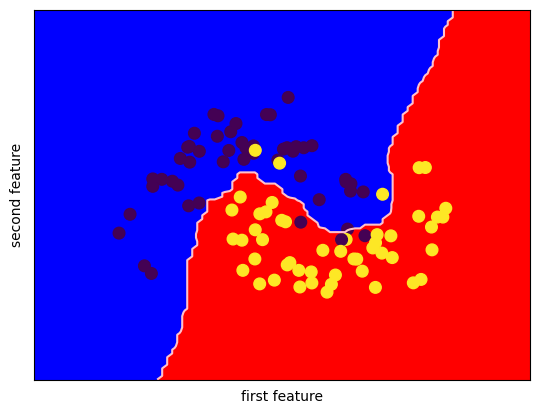

In [11]:
naive = GaussianNB()
naive.fit(x_train, y_train)
predict = naive.predict(x_test)
print_classification_metrics(naive, x, y, predict, y_test)

### Случайный лес

n_estimators =  5
Предсказанные и истинные значения
[1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0]
[1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1]
Матрица ошибок
[[16  1]
 [ 3 15]]
Точность классификации:  0.8857142857142857
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.94      0.83      0.88        18

    accuracy                           0.89        35
   macro avg       0.89      0.89      0.89        35
weighted avg       0.89      0.89      0.89        35

Значение площади под кривой ошибок (AUC ROC)
0.8872549019607844
Область принятия решений


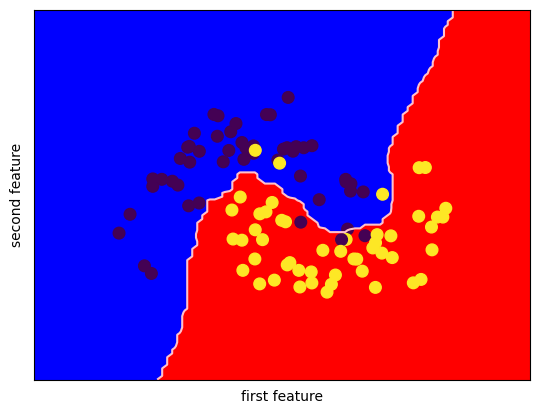

n_estimators =  10
Предсказанные и истинные значения
[1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0]
[1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1]
Матрица ошибок
[[16  1]
 [ 3 15]]
Точность классификации:  0.8857142857142857
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.94      0.83      0.88        18

    accuracy                           0.89        35
   macro avg       0.89      0.89      0.89        35
weighted avg       0.89      0.89      0.89        35

Значение площади под кривой ошибок (AUC ROC)
0.8872549019607844
Область принятия решений


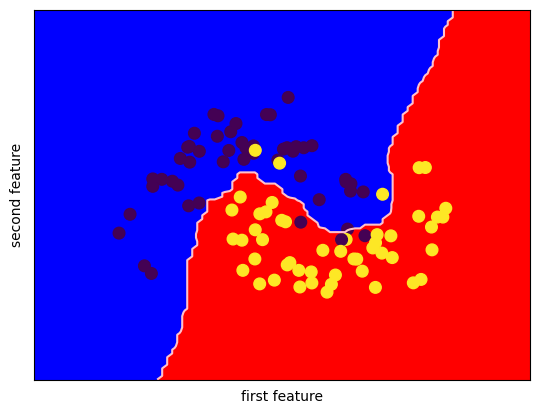

n_estimators =  15
Предсказанные и истинные значения
[1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0]
[1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1]
Матрица ошибок
[[16  1]
 [ 3 15]]
Точность классификации:  0.8857142857142857
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.94      0.83      0.88        18

    accuracy                           0.89        35
   macro avg       0.89      0.89      0.89        35
weighted avg       0.89      0.89      0.89        35

Значение площади под кривой ошибок (AUC ROC)
0.8872549019607844
Область принятия решений


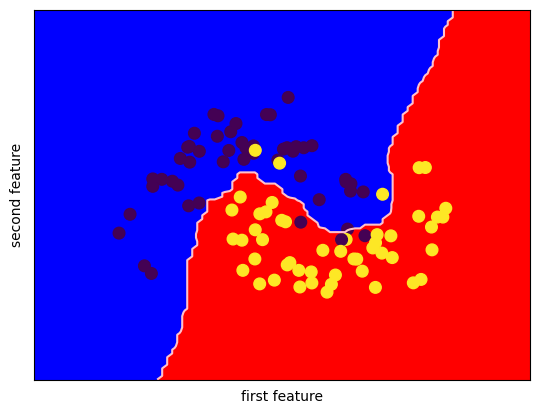

n_estimators =  20
Предсказанные и истинные значения
[1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0]
[1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1]
Матрица ошибок
[[16  1]
 [ 2 16]]
Точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.89      0.91        18

    accuracy                           0.91        35
   macro avg       0.92      0.92      0.91        35
weighted avg       0.92      0.91      0.91        35

Значение площади под кривой ошибок (AUC ROC)
0.9150326797385621
Область принятия решений


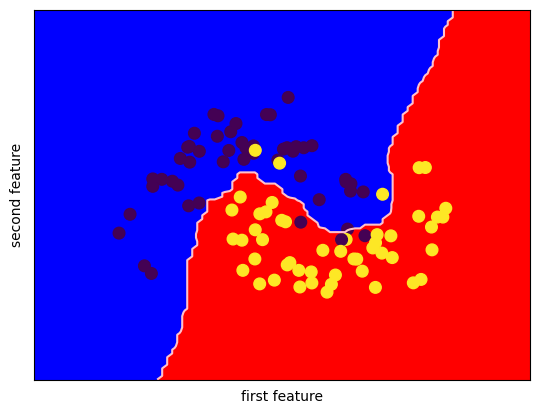

n_estimators =  50
Предсказанные и истинные значения
[1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0]
[1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1]
Матрица ошибок
[[16  1]
 [ 2 16]]
Точность классификации:  0.9142857142857143
Значения полноты, точности, f1-меры и аккуратности
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.89      0.91        18

    accuracy                           0.91        35
   macro avg       0.92      0.92      0.91        35
weighted avg       0.92      0.91      0.91        35

Значение площади под кривой ошибок (AUC ROC)
0.9150326797385621
Область принятия решений


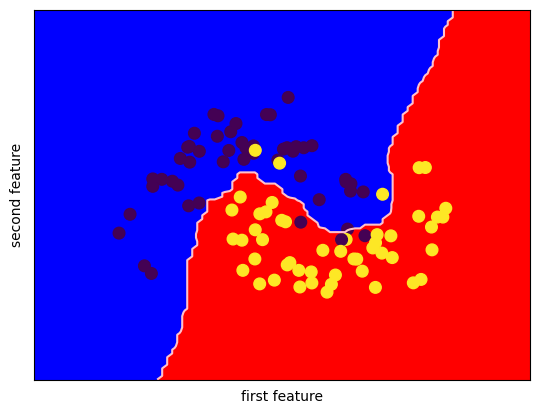

In [12]:
for i in [5, 10, 15, 20, 50]:  
    rand_forest = RandomForestClassifier(n_estimators=i)
    rand_forest.fit(x_train, y_train)
    prediction = rand_forest.predict(x_test)
    print("n_estimators = ", i)
    print_classification_metrics(knn, x, y, prediction, y_test)